<a href="https://colab.research.google.com/github/Dhanashri-Dewade/playstore-data-analysis/blob/main/Dhanashri_Dewade_Playstore_Data_Review_Analysis(EDA)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

In this project, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. Analyzing such data could find the answers.

# **Data Collection**

There are two datasets:

1.play_store_data.csv: contains all the details of the apps on Google Play.

2.user_reviews.csv: contains  reviews for each app. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

# **Technology**

Python (Pandas, Numpy, Plotly, Seaborn and Matplotlib) using colab Notebook

# **Description of Playstore Dataset columns**

1.App : The name of the app                                
2.Category : The category of the app                       
3.Rating : The rating of the app in the Play Store                                          
4.Reviews : The number of reviews of the app                                                                                                                        
5.Size : The size of the app                                                                                                                      
6.Install : The number of installs of the app                                                                                                                        
7.Type : The type of the app (Free/Paid)                                     
8.Price:The price of the app (0 if it is Free)                                                                         
9.Content Rating :The appropiate target audience of the app                                                                                                                              
10.Genres: The genre of the app                                                                                                
11.Last Updated : The date when the app was last updated                                                                          
12.Current Ver : The current version of the app                  
13.Android Ver : The minimum Android version required to run the app

# **Description of User Review Dataset columns**


1.App : The name of the application                        
2.Translated_Review : comment given by user               
3.Sentiment : view or opinion of the user                 
4.Sentiment_Polarity : Strongness of Sentiment polarity        
5.Sentiment_Subjectivity : It is a public opinion and not a factual information.



In [ ]:
# Let us begin with importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date


In [ ]:
data=pd.read_csv('/content/Play Store Data.csv')
reviews=pd.read_csv('/content/User Reviews.csv')

After loading the dataset, we can start the exploration but before that, we need to check and see that the dataset is ready for performing several exploration operations or not, so let’s first have a look at the structure and the manner in which the data is organized.

**head(): It returns the first five data.**

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**info(): It informs about data columns and data types.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**tail(): It returns the last five data.**

In [ ]:
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


**shape : It gives number of rows and columns in a tuble.**

In [ ]:
data.shape

(10841, 13)

**columns : It returns data columns.**

In [ ]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# **Explore The User Review Dataset**

In [ ]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
reviews.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
# print rows and column of play store data
print(f"There are total {reviews.shape[0]} rows and {reviews.shape[1]} columns in playstore dataframe.")

There are total 64295 rows and 5 columns in playstore dataframe.


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
reviews.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


**To know if there is any missing value or Nan value in the dataset, we can use the isnull() function.**



In [ ]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

So, we will need to prepare the dataset before performing exploratory data analysis on it.



# **Data Preparation and Cleaning**


Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data, and the combining of data sets to enrich data. Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a recordset, table, or database and refers to identifying incomplete, incorrect, inaccurate, or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

We saw that the dataset contains many Null or missing values. The column Rating, Type , Content Rating , Current Ver , andAndroid Ver contains 1474, 1, 1, 8, and 3 missing values respectively.

Will it not be better if we can define a function to get more useful information about the different attributes of the dataset, also there is one more valid point in defining a function which it will be reusable, and we are going to utilize our defined function several times in future.



In [ ]:
def printinfo():
    d1 = pd.DataFrame(index=data.columns)
    d1['data_type'] = data.dtypes
    d1['null_count'] = data.isnull().sum()
    d1['unique_count'] = data.nunique()
    return d1

Let’s call the function and see what it returns:

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


We have some useful information about the dataset. i.e., we can now see the missing number of values of any attribute, its unique count, and its respective data types.

Now we can start the process of data cleaning, lets start with the column Type :-

In [ ]:
data[data.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


Since there is only one missing value in this column, So, let’s fill the missing value. After cross-checking in the play store the missing value is found to be Free, So now we can fill the missing value with free .

In [ ]:
data['Type'].fillna("Free", inplace = True)

After filling the value we can check and see if that has been correctly placed.



In [ ]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Now, we can move on to the column Content Rating :

In [ ]:
data[data['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


By, looking only at these rows it is not easy to say what's actually missing in this row. let us have a look at all of its near rows data. For this purpose, we have iloc and loc function.

In [ ]:
data.loc[10465:10475, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10465,Portable Wi-Fi hotspot Free,COMMUNICATION,4.0,1711,2.1M,"100,000+",Free,0,Everyone,Communication,"January 11, 2018",1.2.5.4-11,2.3 and up
10466,Wi-Fi Networks,PRODUCTIVITY,4.2,115,1.4M,"10,000+",Free,0,Everyone,Productivity,"October 5, 2015",1.4,4.1 and up
10467,FI CFL,FINANCE,3.7,112,3.9M,"10,000+",Free,0,Everyone,Finance,"July 5, 2018",1.1.1,5.0 and up
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


We can clearly see that row 10472 has missing data for the Categorycolumn and all the prevailing column values are being replaced with its previous column. A better idea will be to drop this row from our data frame.



In [ ]:
data.dropna(subset = ['Content Rating'], inplace=True)

In [ ]:
data.loc[10465:10475, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10465,Portable Wi-Fi hotspot Free,COMMUNICATION,4.0,1711,2.1M,"100,000+",Free,0,Everyone,Communication,"January 11, 2018",1.2.5.4-11,2.3 and up
10466,Wi-Fi Networks,PRODUCTIVITY,4.2,115,1.4M,"10,000+",Free,0,Everyone,Productivity,"October 5, 2015",1.4,4.1 and up
10467,FI CFL,FINANCE,3.7,112,3.9M,"10,000+",Free,0,Everyone,Finance,"July 5, 2018",1.1.1,5.0 and up
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


We are having some of the unwanted columns which will be of not much use in the analysis process. So let’s drop those columns.



In [ ]:
data.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

Now, we can fix the Rating column which contains a total of 1474 of missing values. Replacing the missing values with the Mode value of that entire column.



In [ ]:
modeValueRating = data['Rating'].mode()

In [ ]:
data['Rating'].fillna(value=modeValueRating[0], inplace = True)

Finally, after fixing all the missing values, we should have a look at our data frame, We defined a function as printinfo() . So, it’s time to use that function.

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


All the columns have the null_count as zero, which indicates that now the data frame doesn’t contain any missing values.


Now we are done with the data cleansing part and in a state to start the work for data preparation

Columns like Reviews, Size, Installs, & priceshould have an integer or floatdatatype, But here we can see of objecttype, So let’s convert them to their respective correct type.

Starting with the column Reviews , converting its type to int

In [ ]:
data['Reviews'] = data['Reviews'].astype(int)

We can see that the changes have taken its effect or not by calling our printinfo() function.

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


Now, the reviews column has been converted to int type, so now we can move to the Column: Size
Converting the Size Column from object to integer, but this column contains some of the special characters like , , + , M , K & also it has a some of the value as Varies with device . We need to remove all of these and then convert it to int or float .

**Removing the +Symbol:**

In [ ]:
data['Size'] = data.Size.apply(lambda x: x.strip('+'))# Removing the + Sign

**Removing the , symbol:**

In [ ]:
data['Size'] = data.Size.apply(lambda x: x.replace(',', ''))# For removing the `,`

**Replacing the M symbol by multiplying the value with 1000000:**

In [ ]:
data['Size'] = data.Size.apply(lambda x: x.replace('M', 'e+6'))# For converting the M to Mega

**Replacing the k by multiplying the value with 1000:**



In [ ]:
data['Size'] = data.Size.apply(lambda x: x.replace('k', 'e+3'))# For convertinf the K to Kilo

**Replacing the Varies with device value with Nan :**

In [ ]:
data['Size'] = data.Size.replace('Varies with device', np.NaN)

Now, finally converting all these values to numeric type:

In [ ]:
data['Size'] = pd.to_numeric(data['Size']) # Converting the string to Numeric type

So, after performing all of these operations, we should have a detailed look at that column, so yes again we will call our useful function which we defined. i.e., printinfo()

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,float64,1695,459
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


Since we converted the Varies with device value to Nan , so we have to do something with those set of Nan values data. It will be a better idea to drop the Rows of the column Size having Nanvalues because it will be not an efficient idea to replace those values with mean or mode since the size of some apps would be too large and some of them too small

In [ ]:
data.dropna(subset = ['Size'], inplace=True)

Column: Installs :
To convert this column from object to integer type. First of all, we will need to remove the +symbol from these values.

In [ ]:
data['Installs'] = data.Installs.apply(lambda x: x.strip('+'))

and then let’s remove the , symbol from the numbers.

In [ ]:
data['Installs'] = data.Installs.apply(lambda x: x.replace(',', ''))

Lastly, we can now convert it from string type to numeric type, and then have a look at our dataset.



In [ ]:
data['Installs'] = pd.to_numeric(data['Installs'])

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


So, now we are only left with the Price column.
Column: Price :
Converting this column from objectto Numeric type.

In [ ]:
data['Price'].value_counts()

0          8421
$0.99       145
$2.99       114
$1.99        66
$4.99        65
           ... 
$389.99       1
$19.90        1
$1.75         1
$14.00        1
$1.04         1
Name: Price, Length: 87, dtype: int64

The values contain a special symbol $ which can be removed and then converted to the numeric type.



In [ ]:
data['Price'] = data.Price.apply(lambda x: x.strip('$'))

In [ ]:
data['Price'] = pd.to_numeric(data['Price'])

After fixing all the issues, we should have a final look at the data frame.



In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9145 non-null   object 
 1   Category        9145 non-null   object 
 2   Rating          9145 non-null   float64
 3   Reviews         9145 non-null   int64  
 4   Size            9145 non-null   float64
 5   Installs        9145 non-null   int64  
 6   Type            9145 non-null   object 
 7   Price           9145 non-null   float64
 8   Content Rating  9145 non-null   object 
 9   Genres          9145 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 785.9+ KB


In [ ]:
data.shape

(9145, 10)

Now, we are finally done. In this section Data Preparation and Cleaning. We can see that the original dataset contained 10841 Rows and 13 Columns. It contained App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Curernt Ver, and Android VerColumns. But after cleansing the dataset and dropping the unwanted rows and columns having Null Values and Garbage data from the data frame, we are left with 9145 Rows and 10 Columns.



In [ ]:
updated_reviews=reviews.dropna(subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity','Sentiment_Subjectivity'],how='all')
updated_reviews.shape

(37432, 5)

# **Exploratory Analysis and Visualization**
In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers of the images. This communication is achieved through the use of a systematic mapping between graphic marks and data values in the creation of the visualization. This mapping establishes how data values will be represented visually, determining how and to what extent the property of a graphic mark, such as size or color, will change to reflect changes in the value of a datum.

Let’s begin by importing matplotlib.pyplot and seaborn , and at the same time set our fig size, font size, etc.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# **Q.1**
**what are the top categories in the play store, which contains the highest number of apps?**

In [ ]:
y = data['Category'].value_counts().index
x = data['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

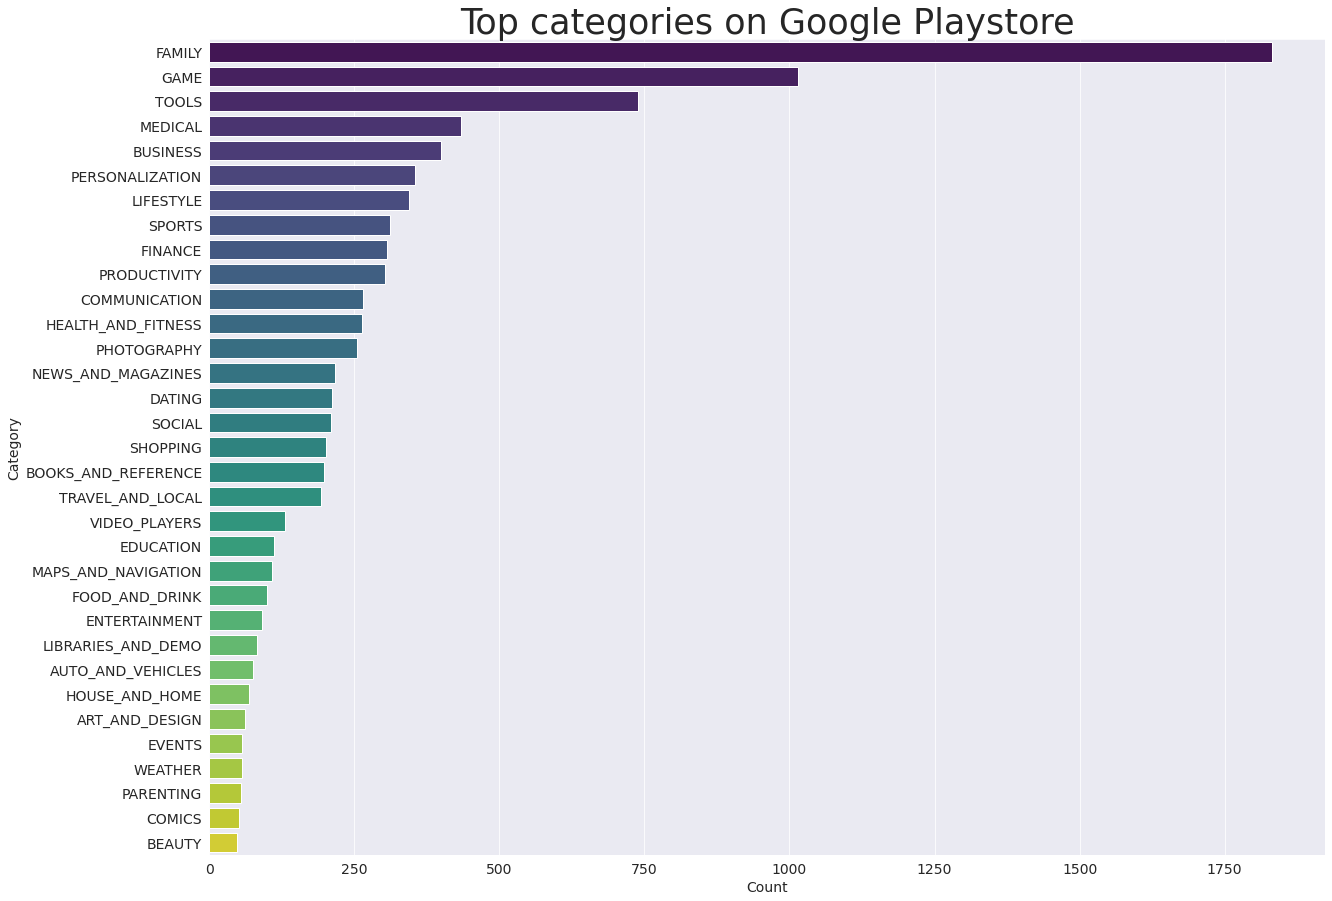

In [ ]:
# We have defined our x and y axis. Let us plot and see
plt.figure(figsize=(20,15))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "viridis")
graph.set_title("Top categories on Google Playstore", fontsize = 35);


***Interpretation:*** from the above graph,**FAMILY** is top category in the play store, which contains the highest number of apps.afterthat the **GAME** category.

### **Now the number of installs in each category**

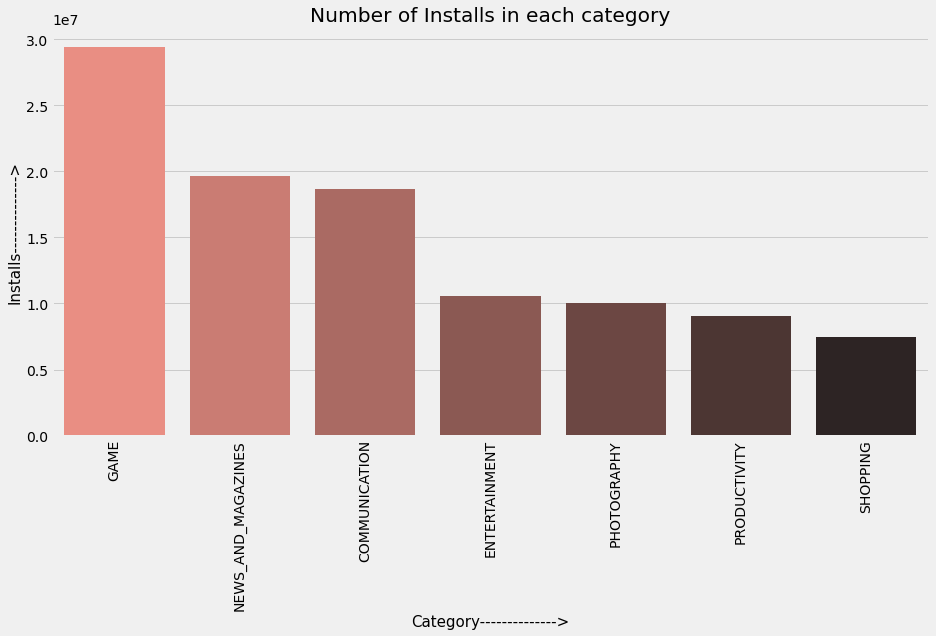

In [ ]:
# here we are using group by function to group category and installs.
scene_1=(data.groupby("Category").agg({"Installs":"mean"})
        .sort_values(by="Installs",ascending=False)
        .reset_index().head(7))
point_1=pd.DataFrame(scene_1)

# we are plotting bar plot for above grouped dataframe
plt.figure(figsize=(14,7))
plt.style.use("fivethirtyeight")
sns.barplot(y="Installs",x="Category",data=point_1,palette="dark:salmon_r")
plt.xlabel("Category-------------->", fontsize=15)
plt.ylabel("Installs-------------->", fontsize=15)
plt.title("Number of Installs in each category")
plt.xticks(rotation=90)
plt.show();

### **Q.2**

**What is the Denisty of Rating**

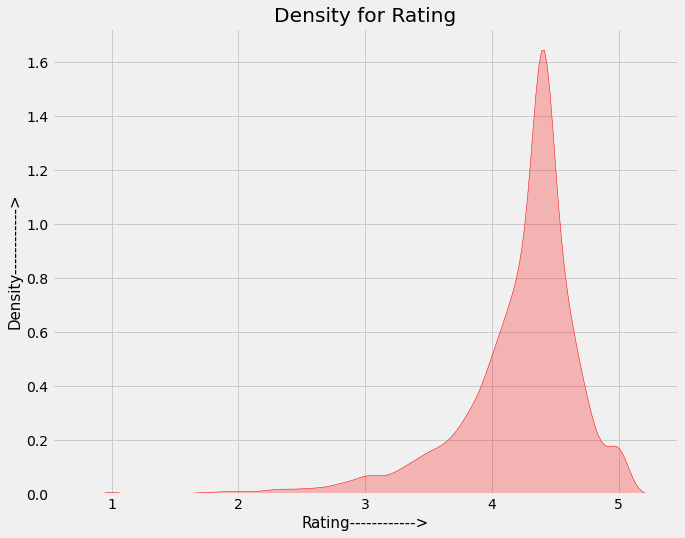

In [ ]:
plt.figure(figsize=(10,8))
plt.style.use("fivethirtyeight")
sns.kdeplot(data["Rating"],color="red",shade = True)
plt.xlabel("Rating------------>", fontsize=15)
plt.ylabel("Density------------>", fontsize=15)
plt.title("Density for Rating")
plt.show();

From above density plot we found that the average volume of ratings across all app categories is between 4-4.5.

# **Q.3**
**Which category of Apps from the ‘Content Rating’ column is found more on the play store?**

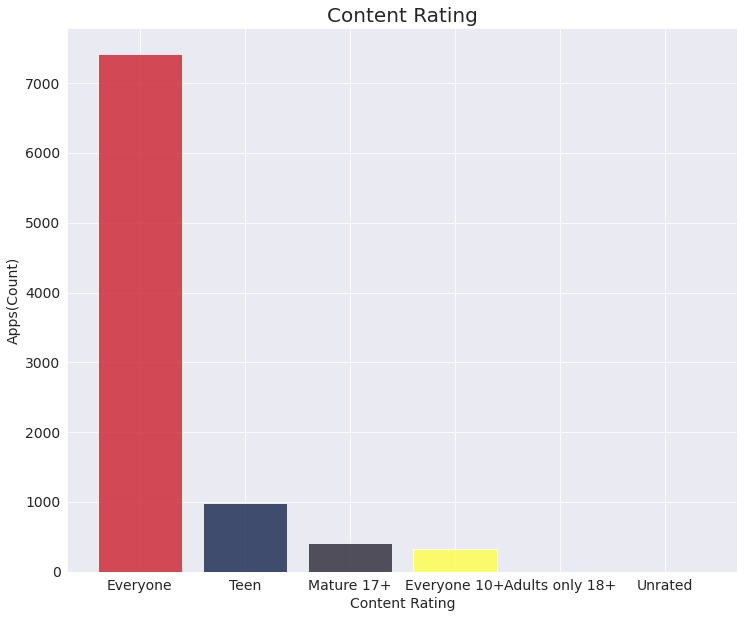

In [ ]:

x2 = data['Content Rating'].value_counts().index
y2 = data['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#CD202D','#15244C','#292734','#FFFF48','#EF2920','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');


***INTERPRETATION:***The  category **EVERYONE** of Apps from the ‘Content Rating’ column is found more on the play store.

# **Q.4**
 **Check if there is any co-relation in both the dataframes.**


In [ ]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068608,0.054812,0.041273,-0.018146
Reviews,0.068608,1.000000,0.238215,0.627720,-0.009839
Size,0.054812,0.238215,1.000000,0.164787,-0.023006
Installs,0.041273,0.627720,0.164787,1.000000,-0.010481
Price,-0.018146,-0.009839,-0.023006,-0.010481,1.000000


In [ ]:
reviews.corr()

,Sentiment_Polarity,Sentiment_Subjectivity
Sentiment_Polarity,1.000000,0.261651
Sentiment_Subjectivity,0.261651,1.000000


In [ ]:
df_copy=data.copy()
df_user_copy=updated_reviews.copy()
merge_df_copy=pd.merge(df_copy,df_user_copy,how='inner', left_on='App', right_on='App')
merge_df_copy.corr()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.238046,0.251000,0.013788,-0.002499,0.051098,0.071268
Reviews,0.238046,1.000000,0.539035,0.526739,-0.044681,-0.150649,-0.025211
Size,0.251000,0.539035,1.000000,0.266151,-0.038047,-0.177277,0.008051
Installs,0.013788,0.526739,0.266151,1.000000,-0.041736,-0.109056,-0.027467
Price,-0.002499,-0.044681,-0.038047,-0.041736,1.000000,0.036346,0.008083
Sentiment_Polarity,0.051098,-0.150649,-0.177277,-0.109056,0.036346,1.000000,0.235261
Sentiment_Subjectivity,0.071268,-0.025211,0.008051,-0.027467,0.008083,0.235261,1.000000


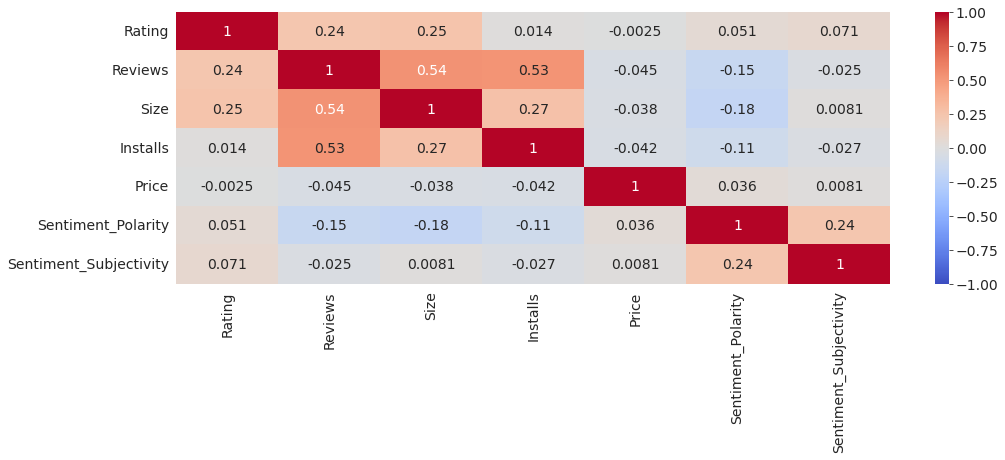

In [ ]:
plt.figure(figsize=(16,5))
sns.heatmap(merge_df_copy.corr(), vmin=-1, cmap='coolwarm', annot=True)

***INTERPRETATION:***After Analysing Above HeatMap, we can infer that there is **no good correlations** between the different columns of both the data sets.

# **Q.5**
 **Correlation map.**

In [ ]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068608,0.054812,0.041273,-0.018146
Reviews,0.068608,1.000000,0.238215,0.627720,-0.009839
Size,0.054812,0.238215,1.000000,0.164787,-0.023006
Installs,0.041273,0.627720,0.164787,1.000000,-0.010481
Price,-0.018146,-0.009839,-0.023006,-0.010481,1.000000


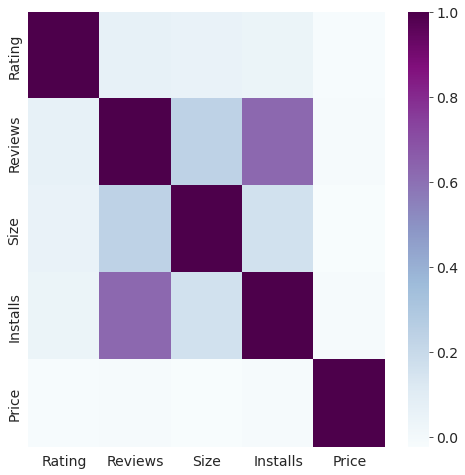

In [ ]:
plt.figure(figsize=(8,8))
corr= data.corr()
sns.heatmap(corr,cmap='BuPu')
plt.show()

# **Q.6**
 **Comparison of Free and paid apps distribution on play store.**

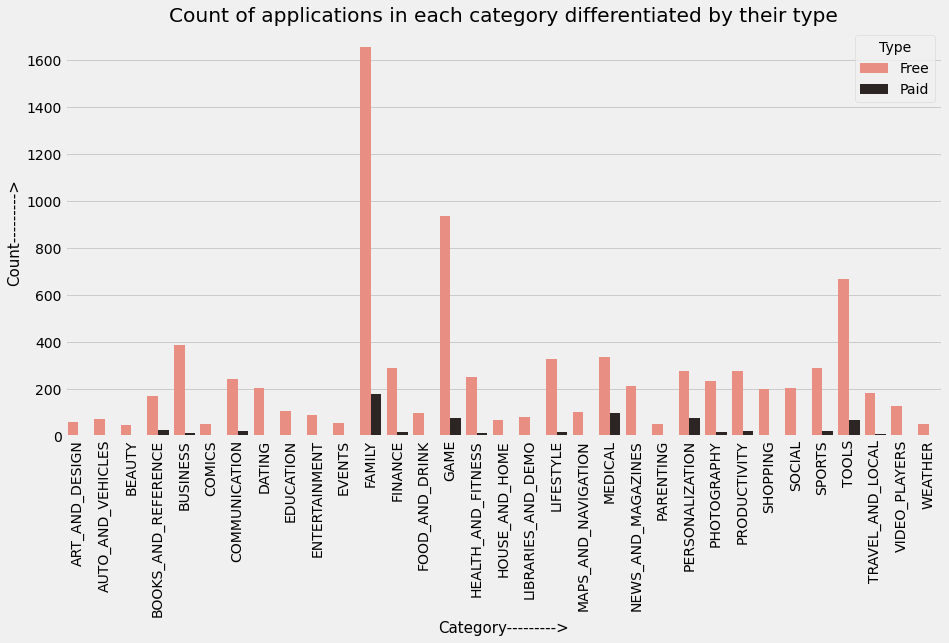

In [ ]:
scene_3=data.groupby(["Category","Type"])["App"].count().reset_index()
point_3=pd.DataFrame(scene_3)
# we are plotting bar plot for above grouped dataframe
plt.figure(figsize=(14,7))
plt.style.use("fivethirtyeight")
sns.barplot(x="Category",y="App",hue="Type",data=point_3,palette="dark:salmon_r")
plt.xlabel("Category--------->", fontsize=15)
plt.ylabel("Count--------->", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.xticks(rotation=90)
plt.show();

 Family, Games, Tools, and Business categories had the biggest number of free apps available for download.

 Family, Games, Tools, and personalization categories had the biggest number of paid apps available for download.

 

# **Q.7**
**Show the distribution of apps in term of their rating, size and type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


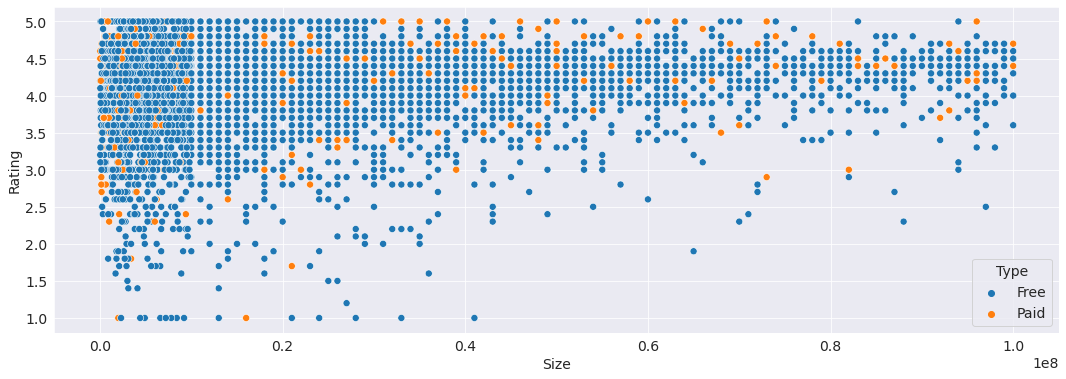

In [ ]:
# 3.show the distribution of apps in term of their rating, size and type
plt.figure(figsize=(18, 6))
sns.scatterplot(data['Size'],
               data['Rating'],
               hue=data['Type'],
               s=50)

# **Q.8**
**What is the top 5 expensive apps?**

In [ ]:
df = data.sort_values(by=['Price'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.00,Everyone,Lifestyle
5354,I am Rich Plus,FAMILY,4.0,856,8700000.0,10000,Paid,399.99,Everyone,Entertainment
5358,I am Rich!,FINANCE,3.8,93,22000000.0,1000,Paid,399.99,Everyone,Finance
5369,I am Rich,FINANCE,4.3,180,3800000.0,5000,Paid,399.99,Everyone,Finance
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41000000.0,1000,Paid,399.99,Everyone,Finance


In [ ]:
print(f'The top 5 most expensive apps in the store are: {", ".join(data["App"].head(5))}')

The top 5 most expensive apps in the store are: Photo Editor & Candy Camera & Grid & ScrapBook, Coloring book moana, U Launcher Lite – FREE Live Cool Themes, Hide Apps, Sketch - Draw & Paint, Pixel Draw - Number Art Coloring Book


### **Q.9**

**sentiments give us an idea about the emotions of the story whether it's positive,negative or neutral**

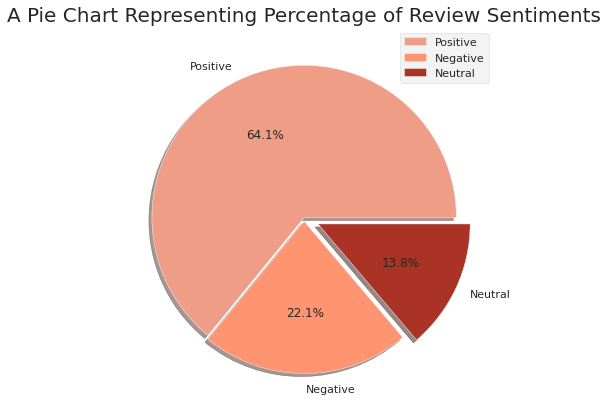

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
slices=reviews.Sentiment.value_counts()
labels=['Positive','Negative','Neutral']
explode=[0,0.025,0.1]
colors = ['#EF9D87','#FF9471','#AB3325']
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(slices,labels=labels,explode=explode,colors = colors,autopct='%1.1F%%',shadow=True);
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.legend()
plt.show();

### **Q.10**

Need to see a more depth understanding of sentiment Polarity and Subjectivity.

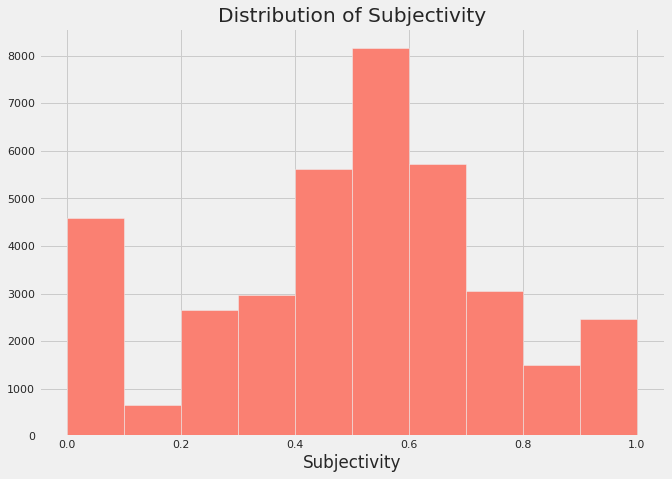

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(reviews.Sentiment_Subjectivity.values,color="salmon")
plt.show();

It can be seen that the maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this, we can conclude that the maximum number of the audience give reviews to the applications, according to their experience.

### **Q.11**

Does sentiments Polarity is proportional to sentiments subjectivity in our story?

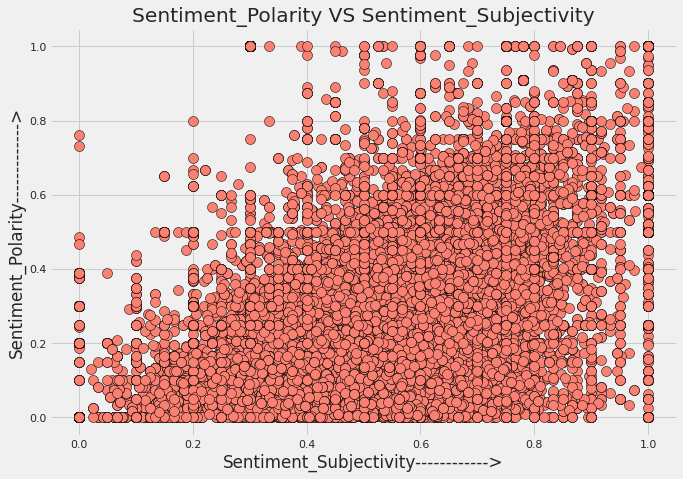

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
y=reviews["Sentiment_Polarity"].abs()
x=reviews["Sentiment_Subjectivity"].abs()
plt.scatter(x,y,s=100,c="salmon",edgecolor="black")
plt.xlabel("Sentiment_Subjectivity------------>")
plt.ylabel("Sentiment_Polarity------------->")
plt.title("Sentiment_Polarity VS Sentiment_Subjectivity")
plt.show();

From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low


In [ ]:
00000

# **Q.12**
**What is the top 5 reviewed apps?**

In [ ]:
df = data.groupby(by=['App', 'Category', 'Rating'])[['Reviews']].sum().reset_index()
df = data.sort_values(by=['Reviews'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2989,GollerCepte Live Score,SPORTS,4.2,9992,31M,"1,000,000+",Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,"100,000+",Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up
2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
2705,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
3079,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up


In [ ]:
print(f'The 5 apps that have the most number of total reviews are: {", ".join(df["App"].head(5))}')

The 5 apps that have the most number of total reviews are: GollerCepte Live Score, Ad Block REMOVER - NEED ROOT, SnipSnap Coupon App, SnipSnap Coupon App, US Open Tennis Championships 2018


# **Conclusion:**
The dataset contains possibilities to deliver insights to understand customer demands better and thus help developers to popularize the product. Dataset can also be used to look whether the original ratings of the app matches the predicted rating to know whether the app is performing better or worse compared to other apps on the Play Store.

Other than that, the charts shown above actually implies that most of the apps having good ratings of above 4.0 are mostly confirmed to have high amount of reviews and user installs. There are some spikes in term of size and price but it shouldn't reflect that apps with high rating are mostly big in size and pricy as by looking at the graphs they are most probably are due to some minority.



*   From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7.
*   From this scatter plot, we can imply that majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.


*   From this plotting we know that most of the apps in the play store are from the categories of 'Family', 'Game' and also 'Tools.
*   Mostly app can use every age group person and Adults only 18+ and unrated have very less number of apps.


*   From the above graph we can interprete that the I am Rich app is the most expensive app in the play_store. But this seems to be like a junk app. We need to further analyze if it is a junk app or not by deploying machine learning models in it.
*   From the above graph we can see that in the Communication category Messenger- Text and Video Chat for Free, WhatsApp Messenger,Gmail has the highest installs. In the same way we by passing different category names to the function, we can get the top 10 installed apps.







# **Summary**
First of all I saw the data of play store data anylysis review project first in it I saw two csv files one which is app_csv file contains all the details of the apps on Google Play. And second file is ser_reviews.csv: contains 100 reviews for each app. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity. Later I studied the app csv file and I saw too many columns like app,category,content rating etc.I have found so many contains a large number of null values in the rating column, so we drop them. Some of the columns have a smaller number of null values, so we replace the null values in these columns with the mode value of that particular column. Our data set also contain the duplicate rows for a single application. We also drop the duplicate rows because the rows contain the identical data. After the cleaning data i turned to Exploratory Data Analysis . I found that majority of the apps in the Play Store are Free apps also top five reviewd apps,top five expensive app. I studied which app mostly installed .Which app are free or paid.I found that majority of the free apps are small in size and having high rating.